TEST CHANGES TO CREATE TIME-SERIES OF MEAN TEMPERATURE FOR EACH DAY OF THE YEAR

We used pandas for this. I know we have agreed on xarray, but we had some difficulties (I am a beginner), and we have decided to address this as we could understand

In [1]:
#importing the modules

import numpy as np
import pandas as pd
from datetime import datetime
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Creating a time series to input data in order to test the first part of code
start_year = '1982,1,1'
end_year = '2017,12,31'

year1 = datetime.strptime(start_year, '%Y,%m,%d')
year2 = datetime.strptime(end_year, '%Y,%m,%d')
#Creating the period
diff_days = (year2 - year1)
date_list = pd.date_range(year1, periods = ((diff_days.days) + 1)).tolist()

len(date_list)

13149

In [4]:
t = range(0,len(date_list))

In [6]:
# using the synthetic sst data (same as in the jupyter notebook from Eric)
sst = np.zeros(len(t))
sst[0] = 0 # Initial condition
a = 0.85 # autoregressive parameter
for i in range(1,len(t)):
    sst[i] = a*sst[i-1] + 0.75*np.random.randn() + 0.5*np.cos(t[i]*2*np.pi/365.25)
sst = sst - sst.min() + 5.

In [7]:
#Creating the mean of temperature files by the day of the year
# Empty lists of day of the month, month and year
day_month = list()
month = list()
year = list()

for day in date_list:
    day_month.append(day.day)
    month.append(day.month)
    year.append(day.year)
# the data frame of year - month - day
final_dataframe = pd.DataFrame({'Year':year,'Month':month,'Day':day_month})

date_list

[Timestamp('1982-01-01 00:00:00', freq='D'),
 Timestamp('1982-01-02 00:00:00', freq='D'),
 Timestamp('1982-01-03 00:00:00', freq='D'),
 Timestamp('1982-01-04 00:00:00', freq='D'),
 Timestamp('1982-01-05 00:00:00', freq='D'),
 Timestamp('1982-01-06 00:00:00', freq='D'),
 Timestamp('1982-01-07 00:00:00', freq='D'),
 Timestamp('1982-01-08 00:00:00', freq='D'),
 Timestamp('1982-01-09 00:00:00', freq='D'),
 Timestamp('1982-01-10 00:00:00', freq='D'),
 Timestamp('1982-01-11 00:00:00', freq='D'),
 Timestamp('1982-01-12 00:00:00', freq='D'),
 Timestamp('1982-01-13 00:00:00', freq='D'),
 Timestamp('1982-01-14 00:00:00', freq='D'),
 Timestamp('1982-01-15 00:00:00', freq='D'),
 Timestamp('1982-01-16 00:00:00', freq='D'),
 Timestamp('1982-01-17 00:00:00', freq='D'),
 Timestamp('1982-01-18 00:00:00', freq='D'),
 Timestamp('1982-01-19 00:00:00', freq='D'),
 Timestamp('1982-01-20 00:00:00', freq='D'),
 Timestamp('1982-01-21 00:00:00', freq='D'),
 Timestamp('1982-01-22 00:00:00', freq='D'),
 Timestamp

In [9]:
# creating the month and day, because we will only need
# the mean for the years in the timespans, so we separated it
month_day = list()

for day in date_list:
    month_day_str = day.strftime("%d %b")
    month_day.append(month_day_str)

mdy = np.array(month_day)
# sorting by the unique values 
month_day_year = np.unique(mdy, return_index=True)
# transposing
month_day_year = pd.DataFrame(month_day_year).T
month_day_year.sort_values(by = 1, inplace = True)

In [12]:
#Full Dataframe with all values
sst_dataframe = pd.DataFrame({'MonthDay':month_day, 'SST':sst})
mean_sst = sst_dataframe.groupby(['MonthDay'], as_index=False).mean()

# Adding month number and day number
n_month = list()
n_day = list()
# dealing with the 29th of February, to put it in the right place
for day in mean_sst['MonthDay']:
    if day == '29 Feb':
        mon = 2
        day = 29
    else:
        mon = datetime.strptime(day, '%d %b').month
        day_month = datetime.strptime(day, '%d %b').day

    n_month.append(mon)
    n_day.append(day_month)
#we had problems to sort the means by month and day in
# just one column, so we have decided to create two more
# columns to the data frame, in which one is the month
# and the other is the day
mean_sst['month_number'] = n_month
mean_sst['day_number'] = n_day
year_temp = mean_sst.sort_values(['month_number', 'day_number'])
year_temp
# the indexes are not in order because when doing the 
# groupby, it grouped by month and day in alphabetical order
# so we have changed it to the right 01/01/1982-31/12/2017

MonthDay        SST  month_number  day_number
4     01 Jan  17.107058             1           1
16    02 Jan  17.132739             1           2
28    03 Jan  17.175252             1           3
40    04 Jan  16.921255             1           4
52    05 Jan  17.196879             1           5
..       ...        ...           ...         ...
314   27 Dec  16.997183            12          27
326   28 Dec  17.025630            12          28
338   29 Dec  17.084560            12          29
350   30 Dec  17.075440            12          30
360   31 Dec  17.023867            12          31

[366 rows x 4 columns]

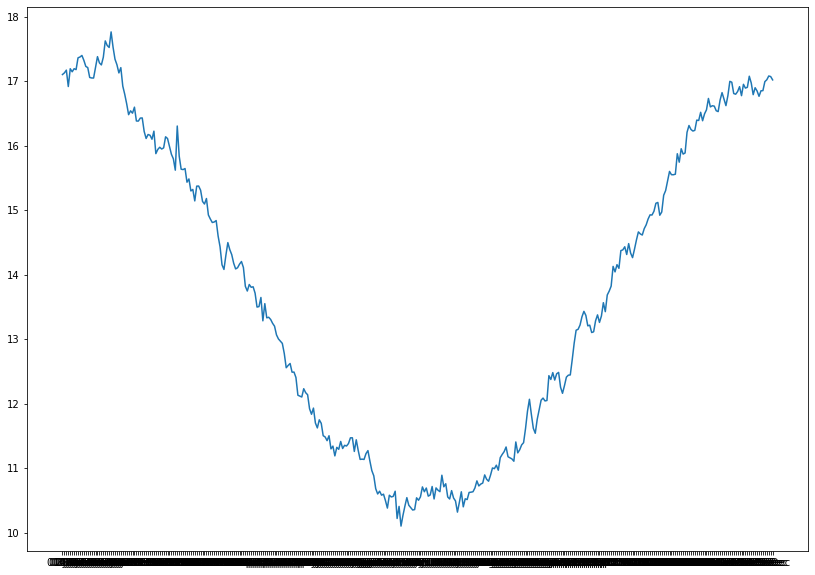

In [13]:
plt.figure(figsize=(14,10))
plt.plot(year_temp['MonthDay'], year_temp['SST'])

#the x axis is not really readable because of the groupby
# question, but it would be just a matter of labelling it 
# correctly